# BI Projekt - Topmotive

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Tabelle 1: Belegdaten

### Daten Vorbereitung

#### Daten einlesen

In [127]:
df_Belege = pd.read_csv('TM_WA_Belege_sample.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Belege

/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿LocalID,BELEG_ART,BELEGDATUM,KTypNr,Fzg_Hersteller,ERSTZULASSUNG,KMSTAND,POS_ART,TEXT1,GENARTNR,...,RechEmpfPLZ,RechEmpfAnrede,RechEmpfhatEMail,RechEmpfhatMobil,RechEmpfmitGeburtstag,Belegerstelltam,Beleggedrucktam,hatbelegversicherdaten,RechEmpfistVersichert,Programmvariant
0,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230706.0,11877,BMW,20170221.0,93572,A,INNENRAUMFILTER ERNEUERN,NaN,...,42719,Herrn,NEIN,NEIN,NEIN,20211209.0,20230706.0,NEIN,NEIN,100.0
1,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,119580,MERCEDES-BENZ,20190410.0,38386,A,KENNZEICHEN : BM-GG 152 KOSTENSTELLE : 1231,NaN,...,50389,Firma,JA,JA,NEIN,20221128.0,20230709.0,NEIN,NEIN,100.0
2,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,QUERLENKER LINKS UNTEN ERNEUERN (VORDERACHSE),NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
3,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,LUFTFILTEREINSATZ ERNEUERN,NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
4,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,58535,FORD,20160727.0,117214,E,WISCHBLATT,298.0,...,41460,Firma,JA,JA,NEIN,20230202.0,20230709.0,NEIN,NEIN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104495,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230720.0,7932,VW,19971126.0,87541,A,Abgasuntersuchung,NaN,...,49610,Firma,NEIN,NEIN,NEIN,20230714.0,20230720.0,NEIN,NEIN,100.0
104496,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230724.0,108631,VW,20190423.0,86091,E,MotorËl Liqui Moly Longlife 5W30 4200,3224.0,...,49661,Frau,NEIN,NEIN,NEIN,20230717.0,20230724.0,NEIN,NEIN,100.0
104497,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,25508,AUDI,20111026.0,203253,E,"OELABLASS-SCHR. 14X1,5 VW/SEAT",593.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0
104498,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,18418,AUDI,20080317.0,250614,E,"Filter, Innenraumluft",424.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0


#### Daten Erläuterungen

LocalID: GUID einer einzelnen Werkstatt

BelegID: ID, welche innerhalb einer Werkstatt die Positionen zu einem Vorgang zusammenfast

BELEG_ART: Typ des Beleges; R = Rechnung, G = Gutschrift

BELEGDATUM: Datum des Beleges

KTypNr: Fahrzeugtyp ID des betreffenden Kunden Fahrzeuges

Fzg_Hersteller: Fahrzeug Hersteller des Fahrzeuges

ERSTZULASSUNG: Erstzulassung des betreffenden Kunden Fahrzeuges

KMSTAND: Kilometerstand/Fahrleistung des betreffenden Kunden Fahrzeuges; 0: nicht angegeben

POS_ART: Typ/Art der einzelnen Position ->key_PosArt.csv

TEXT1: Erster Text für die einzelne Position

GENARTNR: ID der Produktgruppe für ET. Nicht immer vorhanden

GENART_BEZ: Bezeichnung der Produktgruppe

Menge: Menge

Mengeneinheit: Mengeneinheit zur Menge

VK_Preis: Verkaufspreis

MWST_Prozent: Mehrwertsteuer

Minuten_pro_AW: Anzahl Minuten pro AW (Arbeitswert)

PLZ: PLZ der Werkstatt

EKPreis: Einkaufspreis

Pos_Text2: Text 2 für die einzelne Position

Fzg_anlage_datum: Anlage Datum des betreffenden Kunden Fahrzeuges

RechEmpfPLZ: PLZ des Rechnungsempfängers

RechEmpfAnrede: Anrede des Rechnungsempfängers

RechEmpfhatEMail: EMail Adresse vorhanden vom Rechnungsempfänger JA/NEIN

RechEmpfhatMobil: Mobil-Nummer vorhanden vom Rechnungsempfänger JA/NEIN

RechEmpfmitGeburtstag: Geburtstag vorhanden vom Rechnungsempfänger JA/NEIN

Belegerstelltam: Erstellungsdatum des Beleges

Beleggedrucktam: Datum des Ausdruckes des Beleges

Hatbelegversicherdaten: Versicherungsdaten vorhanden JA/NEIN

RechEmpfistVersichert: Ist Rechnungsempfänger versichert JA/NEIN

Programmvariant: Version des Werkstatt Programmes

#### Datentypen prüfen und umwandeln

In [128]:
df_Belege.dtypes

ï»¿LocalID                 object
BELEG_ART                  object
BELEGDATUM                float64
KTypNr                      int64
Fzg_Hersteller             object
ERSTZULASSUNG             float64
KMSTAND                     int64
POS_ART                    object
TEXT1                      object
GENARTNR                  float64
GENART_BEZ                 object
Menge                      object
Mengeneinheit              object
VK_Preis                   object
MWST_Prozent                int64
Minuten_pro_AW             object
PLZ                       float64
EKPreis                    object
Pos_Text2                  object
Fzg_anlage_datum          float64
RechEmpfPLZ                object
RechEmpfAnrede             object
RechEmpfhatEMail           object
RechEmpfhatMobil           object
RechEmpfmitGeburtstag      object
Belegerstelltam           float64
Beleggedrucktam           float64
hatbelegversicherdaten     object
RechEmpfistVersichert      object
Programmvarian

Auffäligkeiten:

1. Datumsangaben als float64:
BELEGDATUM, ERSTZULASSUNG, Fzg_anlage_datum, Belegerstelltam, Beleggedrucktam sollten als Datumstypen (datetime) behandelt werden.

2. Numerische Werte als object:
Menge, VK_Preis, EKPreis sollten als numerische Typen (wahrscheinlich float) behandelt werden.
Minuten_pro_AW sollte als int behandelt werden.

3. Postleitzahlen als float64:
PLZ und RechEmpfPLZ sollten als object (Strings) bleiben, um eventuelle führende Nullen zu bewahren.

4. Boolean-Werte für Ja/Nein-Attribute:
RechEmpfhatEMail, RechEmpfhatMobil, RechEmpfmitGeburtstag, hatbelegversicherdaten, RechEmpfistVersichert könnten in Booleans (True/False) umgewandelt werden.

5. Kategorische Daten:
BELEG_ART, Fzg_Hersteller, POS_ART, TEXT1, GENART_BEZ, Mengeneinheit, RechEmpfAnrede könnten als kategorische Typen (category) behandelt werden.

6. MWST_Prozent:
Bleibt als int64, es sei denn, es gibt Fälle, in denen Dezimalstellen vorkommen, dann sollte es zu float geändert werden.

7. GUIDs und IDs:
LocalID und BelegID sollten als object (Strings) bleiben.

In [161]:
#Datentypen anpassen

# Erstelle eine Kopie von df_Belege und speichere sie in df_Belege_dt
df_Belege_dt = df_Belege.copy()

# Konvertiere die Datumsangaben von float64 zu datetime
datumsfelder = ['BELEGDATUM', 'ERSTZULASSUNG', 'Fzg_anlage_datum', 'Belegerstelltam', 'Beleggedrucktam']
for feld in datumsfelder:
    # Konvertiere die Fließkommazahlen zu Strings und entferne die Dezimalstelle
    df_Belege_dt[feld] = df_Belege_dt[feld].astype(str).str.split('.').str[0]
    # Konvertiere die Strings in datetime-Objekte
    df_Belege_dt[feld] = pd.to_datetime(df_Belege_dt[feld], format='%Y%m%d', errors='coerce')


# Konvertiere numerische Werte, die als object typisiert sind
numerische_felder = ['Menge', 'VK_Preis', 'EKPreis']
for feld in numerische_felder:
    df_Belege_dt[feld] = pd.to_numeric(df_Belege_dt[feld], errors='coerce')

# Konvertiere Minuten_pro_AW zu int
df_Belege_dt['Minuten_pro_AW'] = pd.to_numeric(df_Belege_dt['Minuten_pro_AW'], errors='coerce').astype('Int64')

# Konvertiere Booleans
bool_felder = ['RechEmpfhatEMail', 'RechEmpfhatMobil', 'RechEmpfmitGeburtstag', 'hatbelegversicherdaten', 'RechEmpfistVersichert']
for feld in bool_felder:
    df_Belege_dt[feld] = df_Belege_dt[feld].map({'JA': True, 'NEIN': False})

# Konvertiere kategorische Daten
kategorische_felder = ['BELEG_ART', 'Fzg_Hersteller', 'POS_ART', 'TEXT1', 'GENART_BEZ', 'Mengeneinheit', 'RechEmpfAnrede']
for feld in kategorische_felder:
    df_Belege_dt[feld] = df_Belege_dt[feld].astype('category')

# Überprüfe die neuen Datentypen
print(df_Belege_dt.dtypes)

ï»¿LocalID                        object
BELEG_ART                       category
BELEGDATUM                datetime64[ns]
KTypNr                             int64
Fzg_Hersteller                  category
ERSTZULASSUNG             datetime64[ns]
KMSTAND                            int64
POS_ART                         category
TEXT1                           category
GENARTNR                         float64
GENART_BEZ                      category
Menge                            float64
Mengeneinheit                   category
VK_Preis                         float64
MWST_Prozent                       int64
Minuten_pro_AW                     Int64
PLZ                              float64
EKPreis                          float64
Pos_Text2                         object
Fzg_anlage_datum          datetime64[ns]
RechEmpfPLZ                       object
RechEmpfAnrede                  category
RechEmpfhatEMail                  object
RechEmpfhatMobil                  object
RechEmpfmitGebur

#### Duplikate prüfen und entfernen

In [130]:
# Finde alle Duplikate
duplikate = df_Belege[df_Belege.duplicated(keep=False)]

# Zeige die Anzahl der Duplikate an
print(f"Anzahl der Duplikate in df_Belege: {duplikate.shape[0]}")

# Zeige die Duplikate an
if not duplikate.empty:
    print("Duplikate in der Tabelle df_Belege:")
    print(duplikate)
else:
    print("Keine Duplikate gefunden.")

Anzahl der Duplikate in df_Belege: 280
Duplikate in der Tabelle df_Belege:
                                  ï»¿LocalID BELEG_ART  BELEGDATUM  KTypNr  \
1809    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20220712.0   15507   
1810    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20220712.0   15507   
1957    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20221022.0   16283   
1961    025681CB-09C5-4A79-A3E2-5D74D2DD5B7F         R  20221022.0   16283   
3337    049E72E0-DFC3-47AA-A1EC-BCE82C0D2D20         R  20230622.0   53300   
...                                      ...       ...         ...     ...   
103410  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20030403.0     785   
103863  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20051126.0   18692   
103864  C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F         R  20051126.0   18692   
104311  C5D8539A-10D1-4BCC-97D9-E0520C8F8221         R  20230608.0   32274   
104313  C5D8539A-10D1-4BCC-97D9-E0520C8F8221         R  20230608.0 

Auffäligkeiten:

1. Die LocalID sollte theoretisch ein einzigartiger Schlüssel für jede Werkstatt sein. Wenn es mehrere Zeilen mit derselben LocalID und identischen anderen Werten gibt, deutet dies auf eine fehlerhafte Datenerfassung hin.

2. Duplikate beinhalten keine nützlichen Informationen und sollten daher entfernt werden, um die Datenintegrität zu wahren.

In [131]:
# Entferne Duplikate, behalte die erste Instanz (hier wird die df_Belege_dt verwendet, mit bereits angepassten Datentypen)
df_Belege_cleaned = df_Belege_dt.drop_duplicates()

print("Anzahl der Einträge in der Tabelle mit Duplikaten: ", df_Belege_dt.shape[0] , ", und Anzahl der Einträge in der Tabelle ohne Duplikaten: ", df_Belege_cleaned.shape[0])

Anzahl der Einträge in der Tabelle mit Duplikaten:  104500 , und Anzahl der Einträge in der Tabelle ohne Duplikaten:  104166


#### Analyse fehlende Werte

In [132]:
total = df_Belege_cleaned.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
print("Fehlende Werte bei df_Belege_cleaned:")
print(missing_data)

Fehlende Werte bei df_Belege_cleaned:
                        Total
VK_Preis                76626
Mengeneinheit           67572
GENART_BEZ              63776
GENARTNR                63216
EKPreis                 39697
Menge                   19085
Fzg_Hersteller          16998
Beleggedrucktam         10544
RechEmpfAnrede           6996
PLZ                      5019
Belegerstelltam          3996
Fzg_anlage_datum         3923
ERSTZULASSUNG            3578
Minuten_pro_AW           2803
RechEmpfmitGeburtstag    1797
RechEmpfhatMobil         1797
RechEmpfhatEMail         1797
Pos_Text2                1524
hatbelegversicherdaten   1301
RechEmpfistVersichert    1301
Programmvariant          1301
BELEGDATUM               1300
RechEmpfPLZ               433
TEXT1                     301
BELEG_ART                   0
MWST_Prozent                0
POS_ART                     0
KMSTAND                     0
KTypNr                      0
ï»¿LocalID                  0


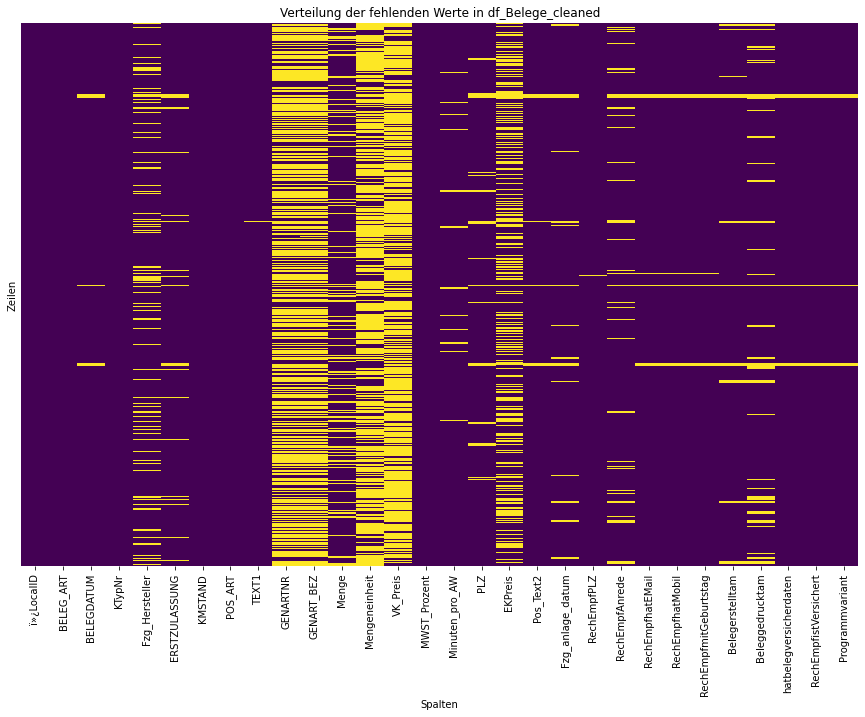

In [133]:
# Erstelle eine neue DataFrame, die True ist, wenn Werte fehlen, sonst False
missing_values = df_Belege_cleaned.isnull()

# Erstelle eine Heatmap, um die fehlenden Daten zu visualisieren
plt.figure(figsize=(15, 10))
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')

# Titel und Labels hinzufügen
plt.title('Verteilung der fehlenden Werte in df_Belege_cleaned')
plt.xlabel('Spalten')
plt.ylabel('Zeilen')

# Zeige das Diagramm
plt.show()

Auffäligkeiten:

1. Hohe Anzahl an fehlenden Werten in bestimmten Spalten:
Die Spalten Mengeneinheit, GENART_BEZ und GENARTNR zeigen eine sehr hohe Anzahl an fehlenden Werten. Dies könnte darauf hindeuten, dass in vielen Fällen spezifische Informationen zu Produktgruppen oder Einheiten nicht erfasst wurden. Es könnte ein Hinweis darauf sein, dass diese Angaben für einige Vorgänge nicht relevant, nicht verfügbar oder bei der Dateneingabe häufig übersehen werden.

2. Daten zu Fahrzeugen unvollständig:
Für Spalten wie Fzg_Hersteller und ERSTZULASSUNG gibt es eine hohe Anzahl an fehlenden Daten. Das Fehlen dieser Informationen könnte auf eine inkonsistente Erfassung von Fahrzeugdaten hinweisen.

1. Fehlende Kontaktinformationen und persönliche Details:
Kontaktinformationen wie RechEmpfhatEMail, RechEmpfhatMobil und RechEmpfmitGeburtstag fehlen relativ oft, was darauf schließen lässt, dass Kunden diese Daten möglicherweise nicht immer angeben oder dass die Erfassung dieser Informationen nicht konsequent durchgeführt wird.

1. Muster in den fehlenden Daten:
Die grafische Darstellung zeigt eindeutige Muster, in denen bestimmte Zeilenbereiche über viele Spalten hinweg fehlende Werte aufweisen.

1. Zeitbezogene Daten und ihre Inkonsistenzen:
Spalten wie Beleggedrucktam und Belegerstelltam weisen eine erhebliche Anzahl an fehlenden Werten auf. Dies deutet auf möglicherweise technische Probleme oder manuelle Eingabefehler hin.

### Statistische Analysen

#### Deskriptive Statistik

count: Anzahl der nicht fehlenden (nicht-NA/null) Einträge.

mean: Der Durchschnittswert der Einträge.

std: Die Standardabweichung, die die Streuung der Daten um den Durchschnitt herum misst.

min: Der kleinste Wert.

25%: Das 25. Perzentil, d.h. 25% der Daten liegen unter diesem Wert.

50%: Das Median oder 50. Perzentil.

75%: Das 75. Perzentil, d.h. 75% der Daten liegen unter diesem Wert.

max: Der größte Wert.

In [134]:
print("Belege")
print(df_Belege_cleaned.describe())

Belege
              KTypNr       KMSTAND      GENARTNR         Menge       VK_Preis  \
count  104166.000000  1.041660e+05  40950.000000  85081.000000   27540.000000   
mean    43084.123390  1.316502e+05   2265.765104      6.656257      86.497168   
std     44571.818172  1.351162e+05   6216.082167    135.587805     770.005003   
min         0.000000  0.000000e+00  -7528.000000    -50.000000   -1200.000000   
25%     11368.000000  6.283200e+04    188.000000      1.000000      15.000000   
50%     22650.000000  1.157065e+05    655.000000      1.000000      62.000000   
75%     59068.000000  1.762040e+05   3096.000000      2.000000      94.000000   
max    153369.000000  9.582192e+06  85017.000000  19005.000000  109500.000000   

        MWST_Prozent  Minuten_pro_AW           PLZ        EKPreis  \
count  104166.000000   101363.000000  99147.000000   64469.000000   
mean       17.669979       40.022819  42522.021685      10.345065   
std         4.816014       26.261261  23082.646016     4

Auffäligkeiten :

1. KTypNr (Fahrzeugtyp ID): Die breite Streuung und die hohe maximale ID-Nummer deuten darauf hin, dass die Daten eine große Vielfalt an Fahrzeugtypen enthalten.
   
2. KMSTAND (Kilometerstand): Der maximale Kilometerstand beträgt über 9 Millionen km, was ungewöhnlich hoch erscheint. Dies könnte auf einen Eingabefehler oder eine falsche Erfassung hindeuten.
   
3. GENARTNR (ID der Produktgruppe): Der minimale Wert ist -7528, dies könnte auf fehlerhafte Daten hinweisen.
   
4. Menge: Es gibt negative Werte bis -50, was in einem Kontext von Mengen unlogisch erscheint. Dies könnte auf Stornierungen oder Rückgaben hinweisen, sollte aber genauer untersucht werden. Ein Maximalwert von 19005 erscheint extrem hoch zu sein.
   
5. VK_Preis (Verkaufspreis): Negative Verkaufspreise (-1200) könnten auf Stornierungen, Gutschriften oder Eingabefehler hinweisen. Ein Maximalwert von 109500 ist sehr hoch und könnte auf einige sehr teure Artikel oder Eingabefehler hinweisen.
   
6. MWST_Prozent (Mehrwertsteuer): Das Vorhandensein von 0% Mehrwertsteuer könnte auf steuerfreie Artikel hinweisen, sollte aber überprüft werden.
   
7. Minuten_pro_AW (Anzahl Minuten pro Arbeitswert): Konstante Werte: Die 25%, 50% und 75% Quantile sind alle 60 Minuten, was darauf hindeutet, dass viele Werte auf genau eine Stunde festgelegt sind. Dies könnte auf Standardwerte hinweisen.
   
8. PLZ (Postleitzahl): Die Postleitzahlen reichen von 1108 bis 99755, was auf eine breite geografische Streuung der Daten hinweist.
   
9.  EKPreis (Einkaufspreis): Negative Einkaufspreise (-92) könnten auf Eingabefehler hinweisen.
Ein Maximalwert, der dem maximalen Verkaufspreis entspricht, könnte auf einen Zusammenhang zwischen diesen beiden Variablen hinweisen.

10. Programmvariant: Die Standardabweichung ist sehr gering, und die meisten Werte sind 100. Dies deutet darauf hin, dass fast alle Datensätze dieselbe Programmversion verwenden.


#### Verteilung den Daten (Histogramme, Balkendiagramme und Boxplots)

1. Balkendiagramm: Gut geeignet, um die Häufigkeit von Kategorien zu zeigen. 
2. Histogramm: Zeigt die Verteilung von numerischen Daten.
3. Boxplot: Kann verwendet werden, um Ausreißer und die Verteilung von Quartilen zu identifizieren.

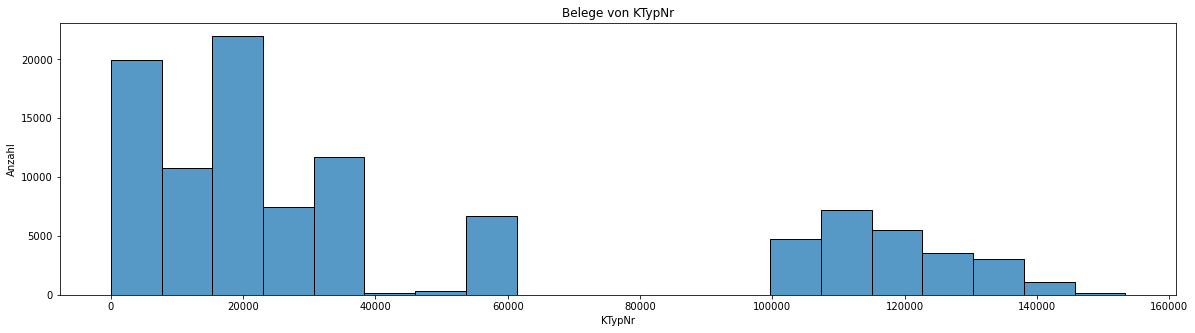

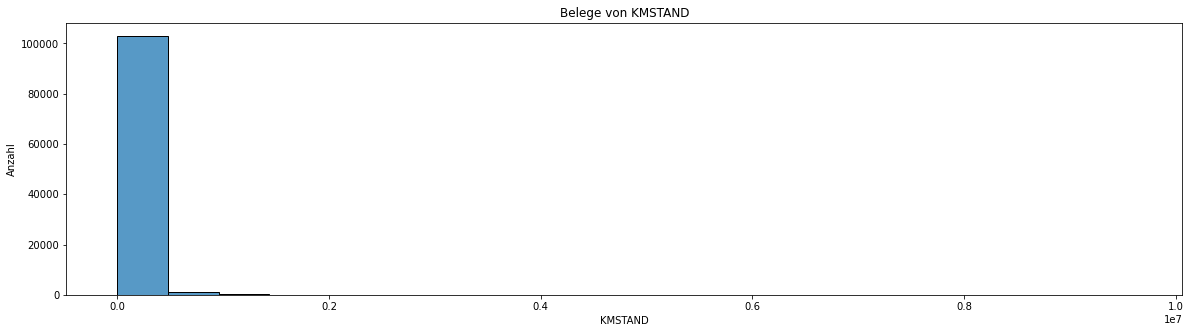

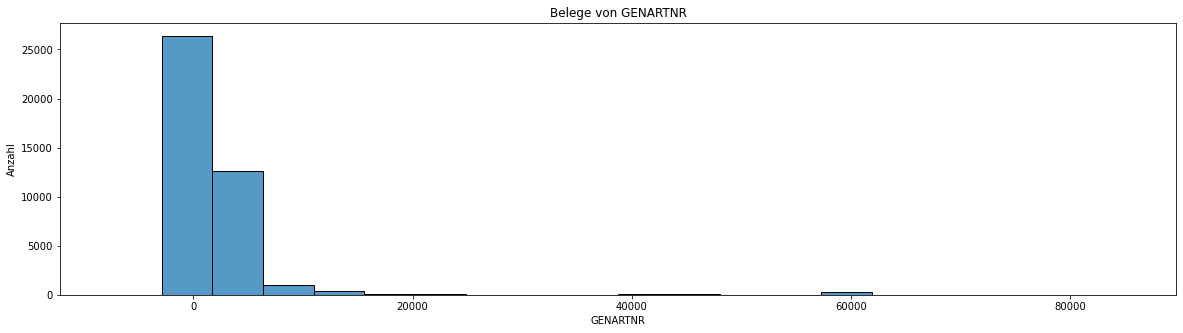

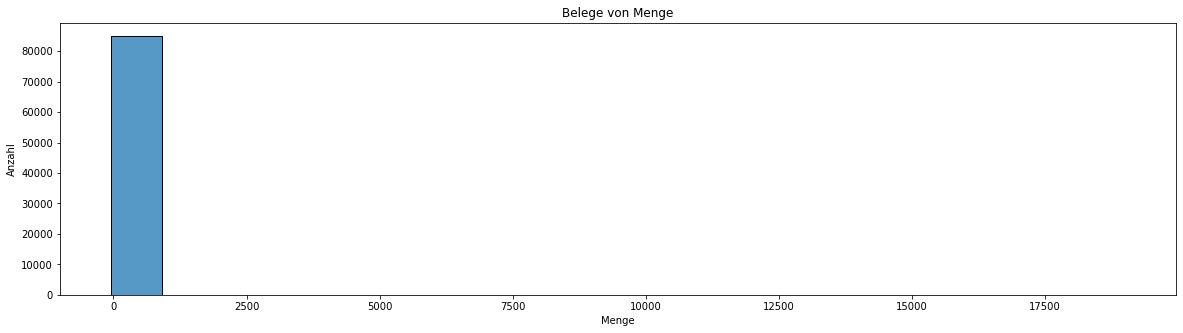

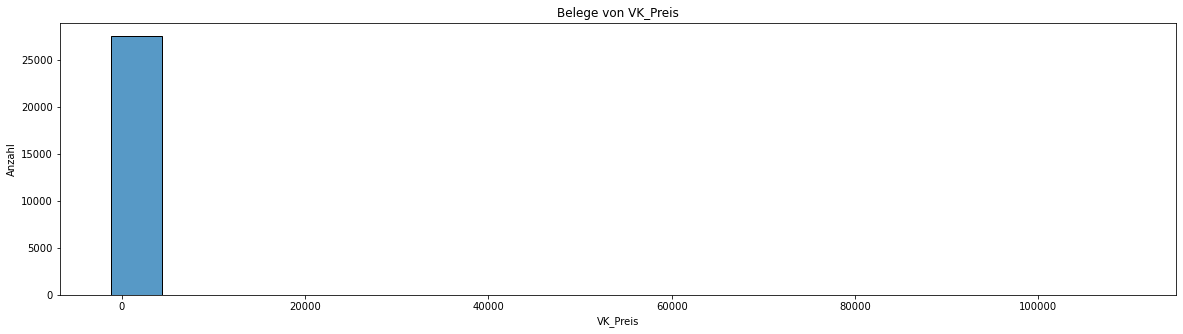

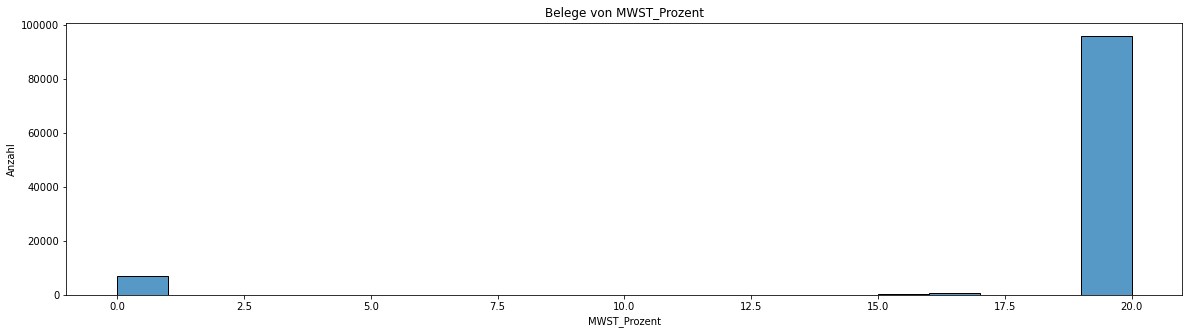

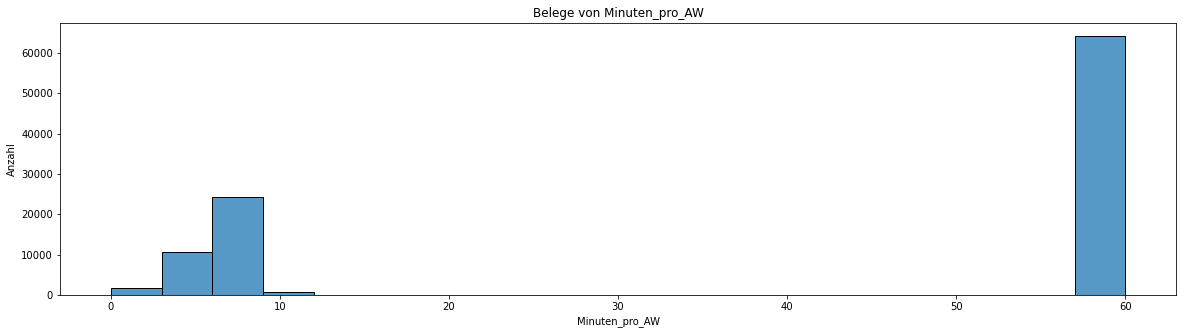

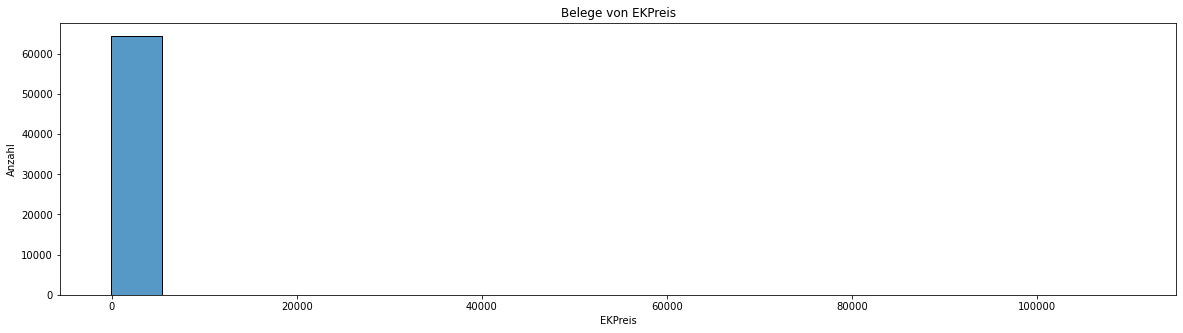

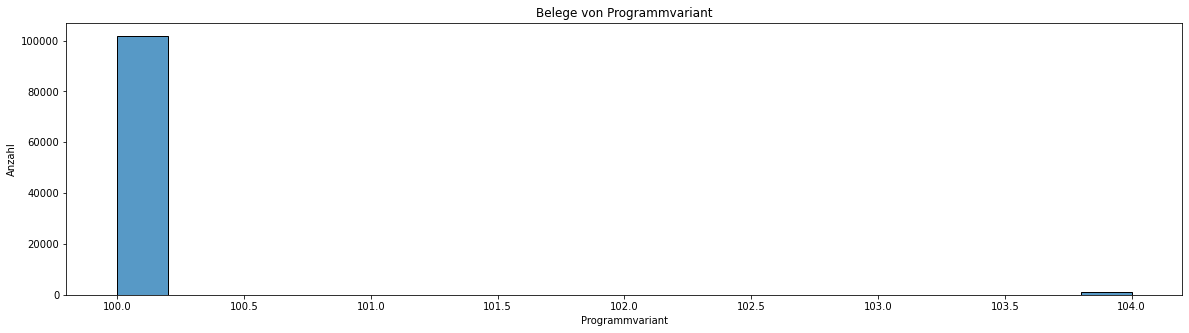

In [135]:
#Diagramme für numerische Daten
num_attributes = ['KTypNr', 'KMSTAND', 'GENARTNR', 'Menge', 'VK_Preis', 'MWST_Prozent', 'Minuten_pro_AW', 'EKPreis', 'Programmvariant']

for attribute in num_attributes:
    plt.figure(figsize=(20, 5))
    sns.histplot(df_Belege_cleaned[attribute].dropna(), kde=False, bins=20)  # KDE auf False setzen, wenn man keine Dichteschätzung braucht
    plt.title(f'Belege von {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Anzahl')
    plt.show()

Auffäligkeiten:

1. KTypNr (Fahrzeugtyp ID): Es gibt eine große Anzahl von Einträgen mit der ID 0, was darauf hindeuten könnte, dass viele Fahrzeuge nicht korrekt klassifiziert wurden oder es sich um einen Platzhalter für fehlende oder unbekannte Werte handelt.
   
2. KMSTAND (Kilometerstand): Das Histogramm zeigt eine extrem rechtsschiefe Verteilung mit einem überwältigenden Anteil von Fahrzeugen mit sehr niedrigem Kilometerstand, was auf viele neue oder wenig genutzte Fahrzeuge im Datensatz hinweist, möglicherweise ist 0 Wert ein Platzhalter für fehlende oder unbekannte Werte.
   
3. GENARTNR (ID der Produktgruppe): Ähnlich wie bei der KTypNr, gibt es eine hohe Anzahl von Einträgen bei 0, was auf eine häufige Nichtspezifikation der Produktgruppe hinweist.
   
4. Menge: Es gibt eine extrem hohe Frequenz von Einträgen bei 0, was darauf hindeutet, dass bei vielen Transaktionen keine Menge angegeben wurde oder es sich um Stornierungen handeln könnte. Bei näherem Betrachtung konnte festgestellt werden, dass es sich gleichzeitg um ein Arbeitswert Position handelt und kein Ersatzteil, daher wurde keine Menge angegeben (0)
   
5. VK_Preis (Verkaufspreis): Die Verteilung ist äußerst rechtsschief, mit den meisten Datenpunkten, die sich auf niedrigere Preise konzentrieren.
   
6. MWST_Prozent (Mehrwertsteuer): der überwiegende Teil der Belege eine Mehrwertsteuer von 20% aufweist.
   
7. Minuten_pro_AW (Anzahl Minuten pro Arbeitswert): Es gibt eine sehr hohe Anzahl von Einträgen bei 60 Minuten, was darauf hindeutet, dass dies ein Standardwert sein könnte oder dass häufig eine Stunde Arbeitszeit verrechnet wird.
   
8. EKPreis (Einkaufspreis): Der EKPreis ist ebenfalls sehr rechtsschief verteilt, mit den meisten Einträgen bei 0, was darauf hindeuten könnte, dass für viele Artikel kein Einkaufspreis erfasst.
   
9.  Programmvariant: Fast alle Belege verwenden die gleiche Programmvariante (100).


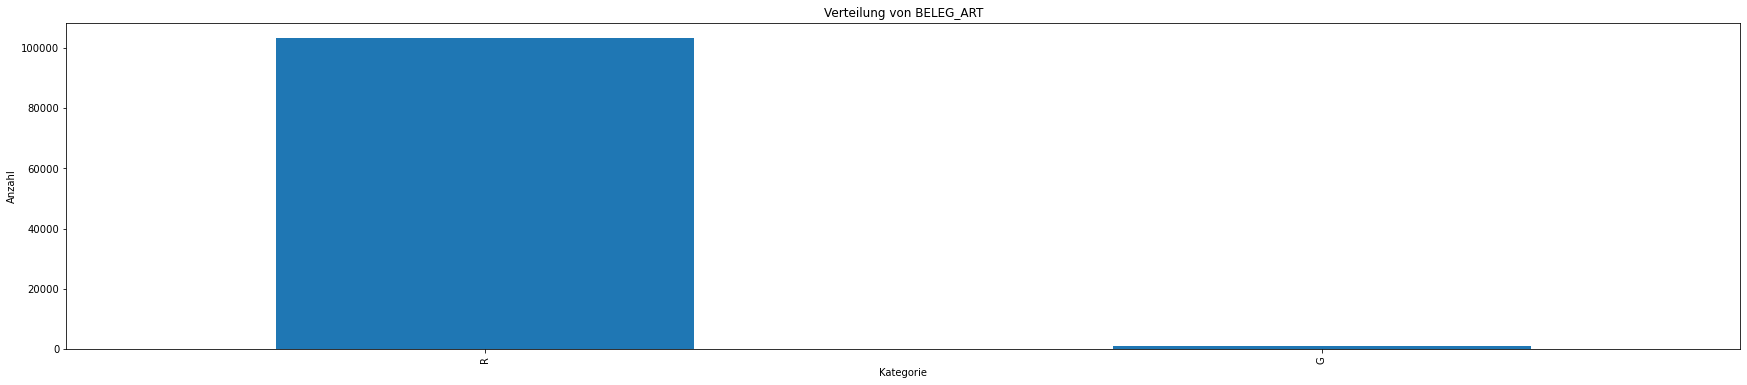

/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


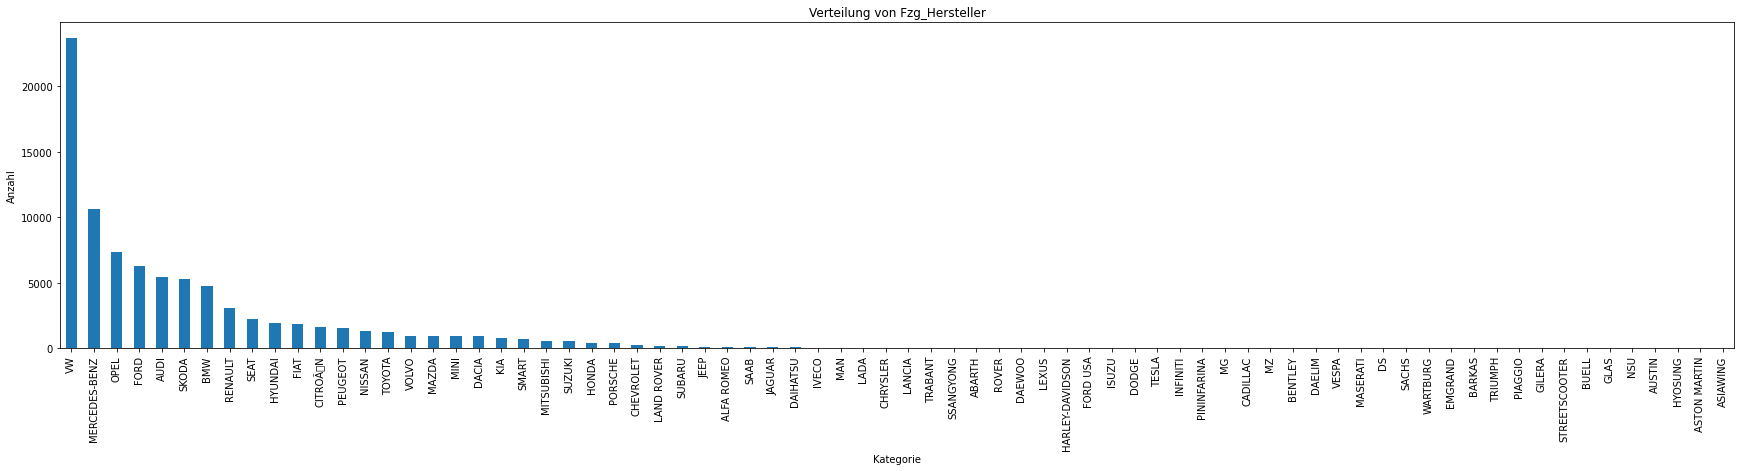

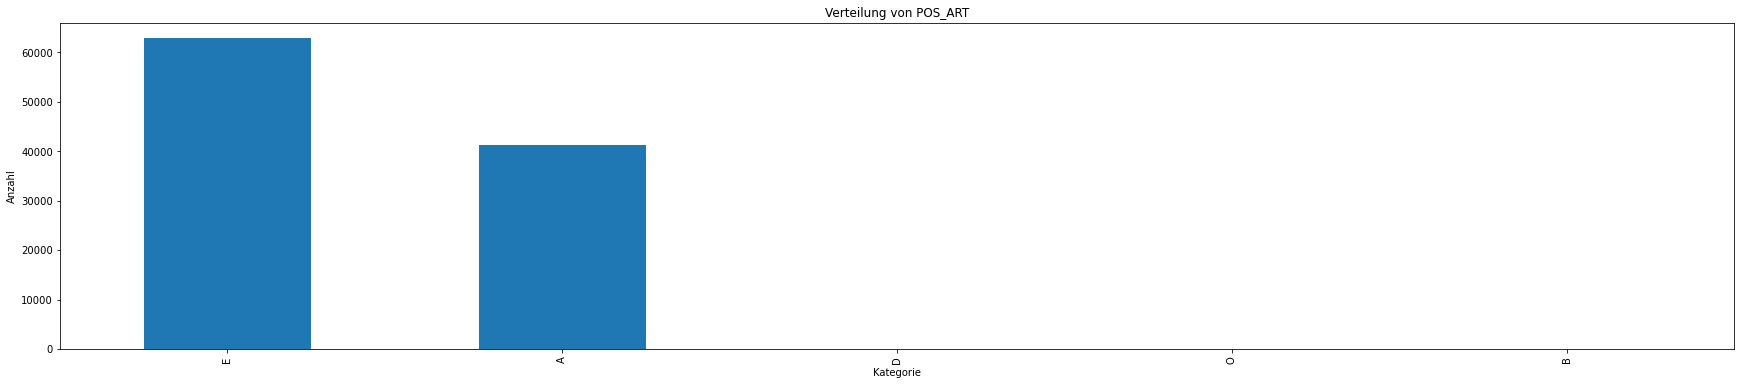

/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


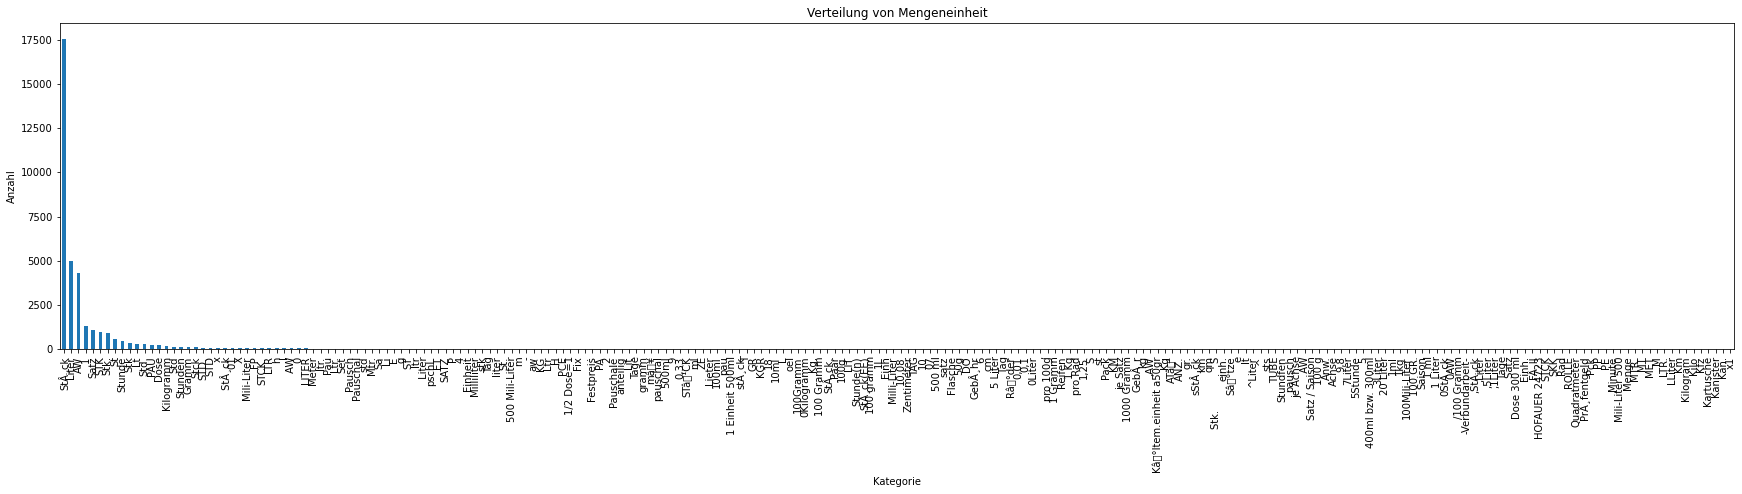

/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/justyna/opt/anaconda3/envs/master_bi/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0, flags=flags)


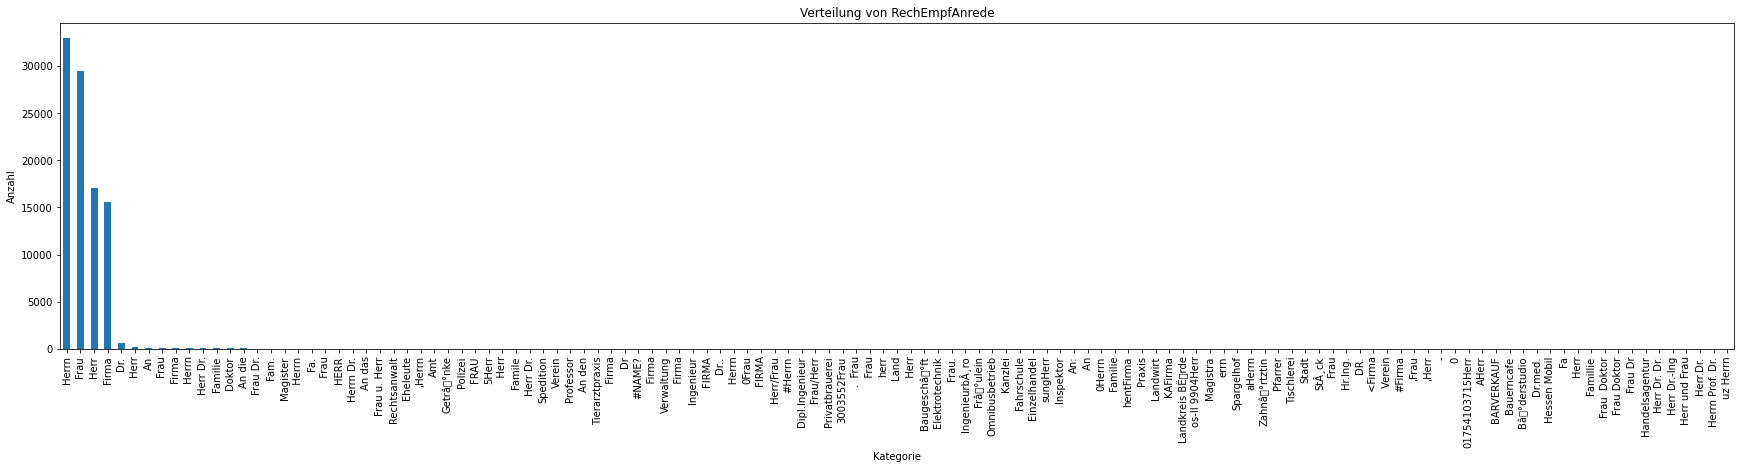

In [136]:
# Diagrame für kategorsiche Daten

# Erstelle eine Liste der kategorischen Attribute die visualisiert sein sollten
cat_attributes = ['BELEG_ART', 'Fzg_Hersteller', 'POS_ART', 'Mengeneinheit', 
                  'RechEmpfAnrede']

# Erstelle für jede kategorische Spalte ein Balkendiagramm.
for column in cat_attributes:
    # Zählen Sie die Vorkommen jeder Kategorie in der aktuellen Spalte.
    counts = df_Belege_cleaned[column].value_counts()

    # Erstellen Sie das Balkendiagramm.
    plt.figure(figsize=(30, 6))
    counts.plot(kind='bar')
    plt.title(f'Verteilung von {column}')
    plt.xlabel('Kategorie')
    plt.ylabel('Anzahl')
    plt.show()

Auffäligkeiten:

1. Verteilung von BELEG_ART: Es gibt eine deutlich ungleiche Verteilung zwischen den Kategorien. Eine Kategorie R = Rechnung dominiert stark über die andere G = Gutschrift.

2. Verteilung von Fzg_Hersteller: Die Verteilung zeigt eine absteigende Häufigkeit, wobei ein Hersteller (VW) deutlich führend ist.

3. Verteilung von POS_ART:  Es gibt zwei dominante Kategorien E (Ersatzteil) und A (Arbeitswert Position).

4. Verteilung von Mengeneinheit: Es gibt eine Vielzahl von Mengeneinheiten, aber nur wenige davon sind sehr häufig. Die meisten Mengeneinheiten treten selten auf, es gibt viele falsch Angaben in den Daten z.B. Liter, 1Liter, L, liter, 1liter usw.

5. Verteilung von RechEmpfAnrede: Einige Anredeformen sind deutlich häufiger als andere (Herrn, Frau, Herr,Firma). Es gibt eine Vielzahl anderer Anredeformen, die aber seltener verwendet werden, ähnlich wie bei Mengeneinheit gibt es falsche Angaben z.B Herr, herr, HERR usw.

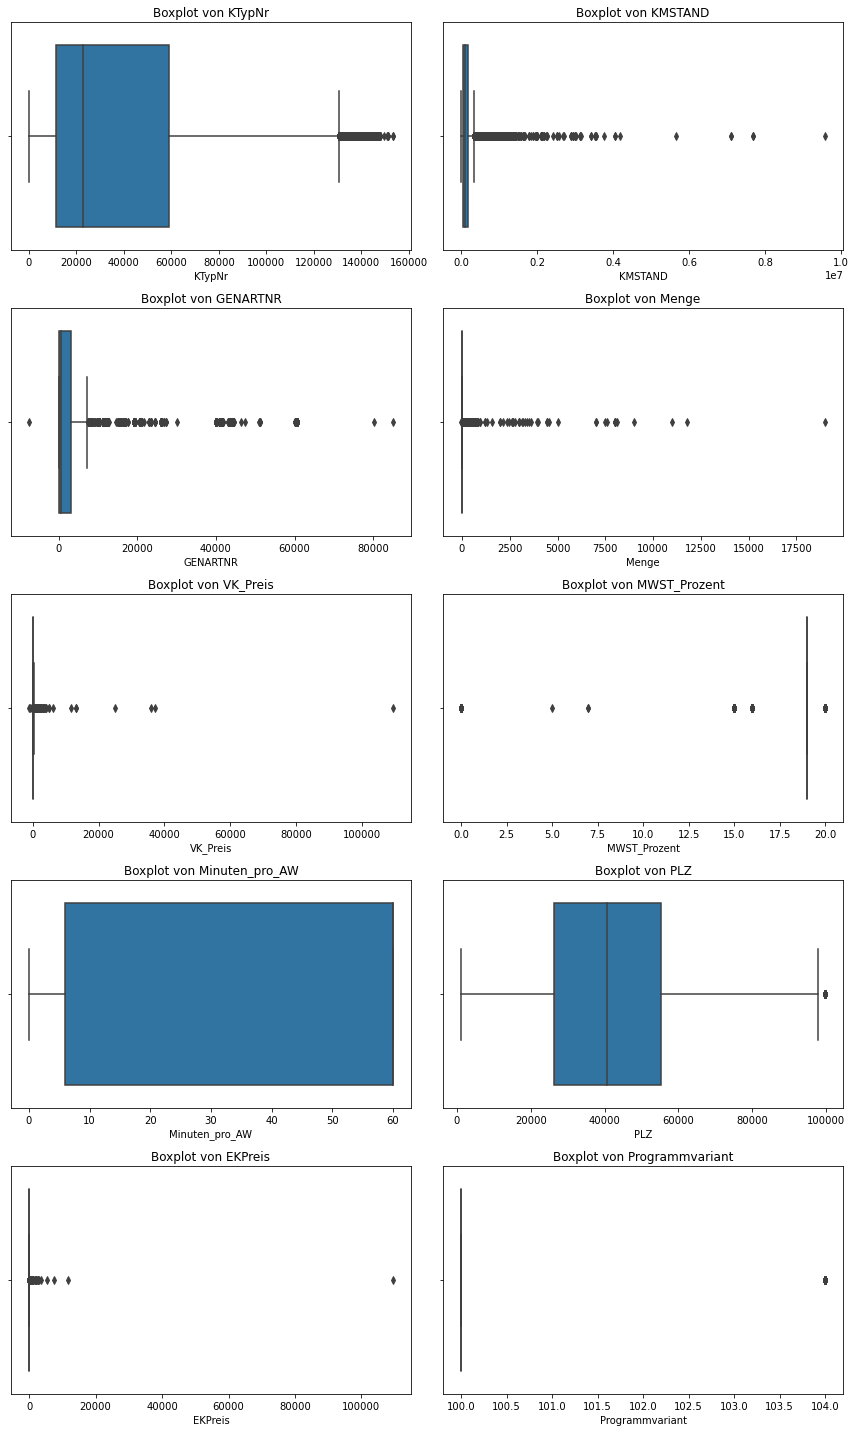

In [137]:
# Bestimme die Anzahl der numerischen Spalten und die Anzahl der gewünschten Spalten pro Reihe
num_columns = df_Belege_cleaned.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)
num_columns_per_row = 2  # oder wie viele mam pro Reihe anzeigen möchte

# Berechne die Anzahl der benötigten Reihen, um alle Plots unterzubringen
num_rows = num_plots // num_columns_per_row + (num_plots % num_columns_per_row > 0)

# Definiere die Größe des gesamten Plots (Breite, Höhe)
plt.figure(figsize=(num_columns_per_row * 6, num_rows * 4))  # Die Größe kann angepasst werden

# Erstelle einen Boxplot für jede numerische Spalte
for index, column in enumerate(num_columns, 1):  # Beginne mit 1 für die subplot-Nummerierung
    plt.subplot(num_rows, num_columns_per_row, index)
    sns.boxplot(x=df_Belege_cleaned[column])
    plt.title(f'Boxplot von {column}')

# Sorge für genügend Platz zwischen den Plots
plt.tight_layout()
plt.show()

Bei der Interpretation von Boxplots sind folgende Merkmale von besonderem Interesse:

1. Median (mittlere Linie des Boxplots): Zeigt den mittleren Wert der Daten.

2. Interquartilsabstand (IQR, die Box selbst): Stellt die mittleren 50% der Daten dar.

3. Whisker (die Linien, die aus der Box herausragen): Sie repräsentieren den Bereich der Daten, der typischerweise als nicht-ausreißerhaft betrachtet wird, oft 1,5-mal den IQR über und unter der Box.

4. Punkte außerhalb der Whisker: diese werden als potenzielle Ausreißer betrachtet.

Auffäligkeiten:

1. KTypNr (Fahrzeugtyp ID): Der Boxplot zeigt viele Ausreißer, was auf eine breite Streuung der Fahrzeugtypen im Datensatz hinweist. Die Mehrheit der Datenpunkte liegt nahe am unteren Quartil, was auf eine Konzentration von Fahrzeugtypen in niedrigeren ID-Bereichen hinweist.
   
2. KMSTAND (Kilometerstand): Es gibt mehrere Ausreißer, die weit über den Großteil der Daten hinausgehen, was auf extrem hohe Kilometerstände hinweist. Der Großteil der Kilometerstände konzentriert sich im unteren Bereich, was erneut auf eine hohe Anzahl von Fahrzeugen mit niedriger Laufleistung hindeutet.
   
3. GENARTNR (ID der Produktgruppe): Die Daten für GENARTNR zeigen eine Konzentration nahe dem unteren Bereich mit mehreren Ausreißern im oberen Bereich. Die breite Streuung der Ausreißer deutet darauf hin, dass einige Produktgruppen sehr selten vorkommen oder sehr hohe Nummern haben.
   
4. Menge: Der Boxplot für Menge zeigt eine hohe Anzahl von Ausreißern, was auf einige Bestellungen mit ungewöhnlich hohen Mengen hinweist.
   
5. VK_Preis (Verkaufspreis): Es gibt eine große Anzahl von hohen Ausreißern, was auf einige sehr teure Verkaufspositionen hinweist. Der Median und die Quartile sind nahe dem unteren Ende des Bereichs, was bedeutet, dass die meisten Verkaufspreise relativ niedrig sind.
   
6. MWST_Prozent (Mehrwertsteuer): Der Boxplot scheint Ausreißer zu zeigen, was ungewöhnlich ist, da Mehrwertsteuersätze in der Regel fest sind
   
7. Minuten_pro_AW (Anzahl Minuten pro Arbeitswert): Die Daten sind stark linksseitig, mit dem Großteil der Werte, die sich am oberen Limit von 60 Minuten konzentrieren, was darauf hindeutet, dass dies möglicherweise ein festgelegter Standardwert ist.
   
8. EKPreis (Einkaufspreis): Ähnlich wie beim Verkaufspreis gibt es auch hier einige hohe Ausreißer. Die meisten Einkaufspreise sind jedoch niedrig oder bei Null.
   
9.  PLZ (Postleitzahl): Der Boxplot für PLZ zeigt eine breite Verteilung mit einigen Ausreißern im oberen Bereich. Die Daten scheinen gleichmäßig über die Postleitzahlenbereiche verteilt zu sein.
    
10. Programmvariant: Es gibt nur sehr wenige Ausreißer, was darauf hinweist, dass nahezu alle Werkstätten dieselbe Programmvariant verwenden.


### Analyse der Zusammenhänge der Daten

#### Verlauf über die Zeit

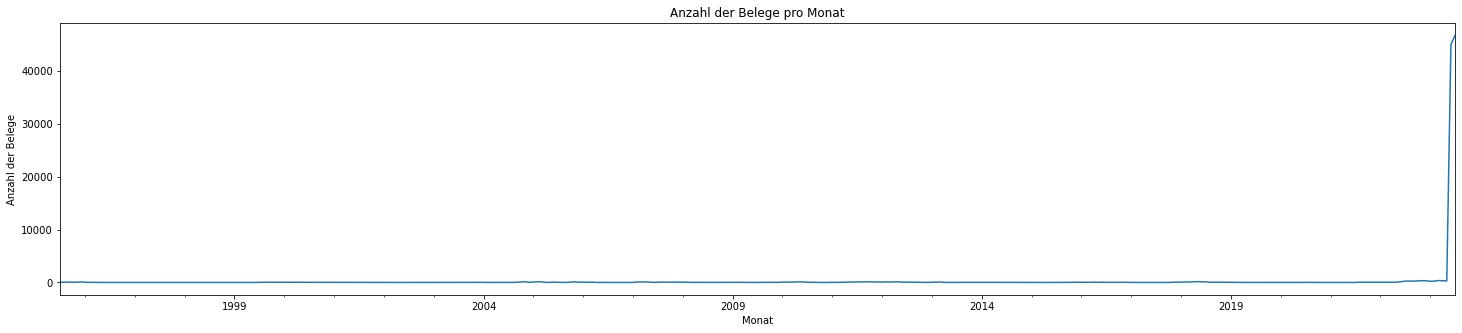

In [138]:
# Sicher stellen, dass die Datumsspalten im richtigen Format sind
df_Belege_cleaned = df_Belege_cleaned.copy()
df_Belege_cleaned['BELEGDATUM'] = pd.to_datetime(df_Belege_cleaned['BELEGDATUM'])

# Datum als Index setzen
df_Belege_cleaned.set_index('BELEGDATUM', inplace=True)

# Sortieren den DataFrame nach dem Index (Datum)
df_Belege_cleaned.sort_index(inplace=True)

# Zählen wie viele Belege pro Monat erstellt wurden
belege_pro_monat = df_Belege_cleaned.resample('M').size()

# Visualisieren die monatliche Anzahl der Belege
plt.figure(figsize=(25, 5))
belege_pro_monat.plot(title='Anzahl der Belege pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Belege')
plt.show()

Auffäligkeiten:

1. Die Anzahl der Belege pro Monat scheint über einen längeren Zeitraum niedrig zu sein (dies deutet auf einen Mangel an Daten für diesen Zeitraum), dann gibt es einen plötzlichen und sehr steilen Anstieg der Anzahl der Belege gegen Ende des gezeigten Zeitraums.

#### Korelationsmatrix

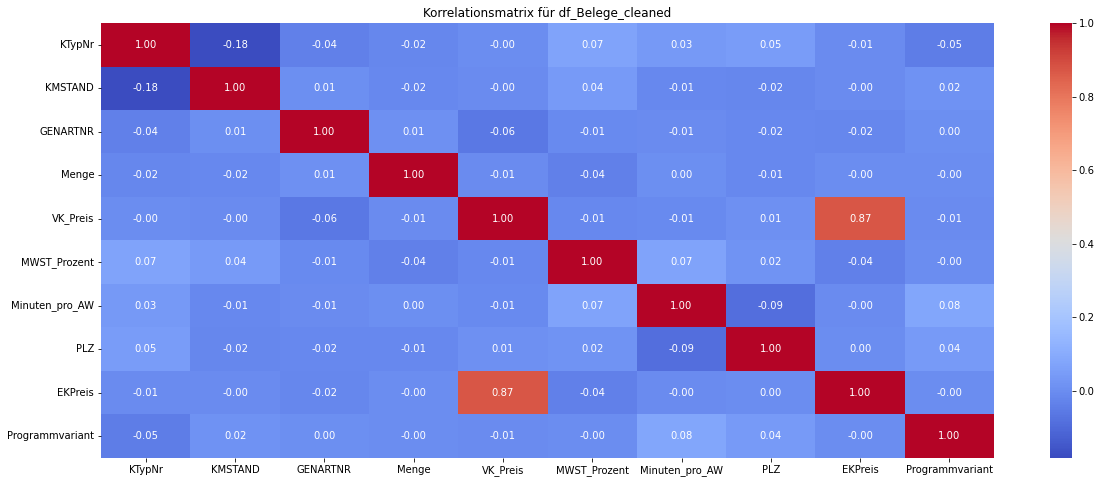

In [139]:
corr_matrix_belege = df_Belege_cleaned.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_belege, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix für df_Belege_cleaned")
plt.show()

Interpretation des Korrelationskoeffizients (r):

1. Nahe +1: Starke positive Korrelation; wenn Wert A steigt, steigt auch Wert B.
2. Nahe -1: Starke negative Korrelation; wenn Wert A steigt, fällt Wert B.
3. Nahe 0: Keine oder eine sehr schwache Korrelation; die Werte A und B scheinen unabhängig voneinander zu sein.

Korrelationsstärke:
1. 0,0 bis 0,2: Sehr schwache Korrelation
2. 0,2 bis 0,4: Schwache Korrelation
3. 0,4 bis 0,6: Moderate Korrelation
4. 0,6 bis 0,8: Starke Korrelation
5. 0,8 bis 1,0: Sehr starke Korrelation

Auffäligkeiten:

1. VK_Preis (Verkaufspreis) und EKPreis (Einkaufspreis) weisen mit 0.87 eine starke positive Korrelation auf, was nahelegt, dass höhere Einkaufspreise tendenziell mit höheren Verkaufspreisen zusammenhängen.

## Tabelle 2: Positionsart

### Daten Vorbereitung

#### Daten einlesen

In [140]:
df_PosArt = pd.read_csv('Key_PosArt.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_PosArt

,PosArt,Bezeichnung
0,A,AW = Arbeitswert Position
1,B,AW (Fremdarbeit)
2,D,AW (Durchläufer §10) - Immer SteuerNr 4 (0%)
3,E,ET = Ersatzteil
4,O,ET(Öle/Schmierstoffe)


#### Daten Erläuterungen

PosArt: Typ/Art der einzelnen Position

Bezeichnung: Bezeichnung der PosArt

### Statistische Analysen

#### Deskriptive Statistik

In [141]:
print("PosArt")
print(df_PosArt.describe())

PosArt
       PosArt                Bezeichnung
count       5                          5
unique      5                          5
top         A  AW = Arbeitswert Position
freq        1                          1


Keine Auffäligkeiten.

## Tabelle 3: Verrechnungsätze

### Daten Vorbereitung

#### Daten einlesen

In [142]:
df_Verrechnung = pd.read_csv('TM_WA_Verrechnungssätze.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Verrechnung

,LocalID,AWArt,AWArt_Bez,VKPreis,VKPreis_Brutto,EKPreis,AWMinuten,c_date
0,0007BD7B-6934-4893-B971-CCA4857B1789,EL,Elektrikarbeiten,"12,40","14,76","6,80","6,00",01.07.2023 11:29:12
1,0007BD7B-6934-4893-B971-CCA4857B1789,KA,Karosseriearbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
2,0007BD7B-6934-4893-B971-CCA4857B1789,LA,Lackierarbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
3,0007BD7B-6934-4893-B971-CCA4857B1789,NaN,Verrechnungssatz Autohaus Zorn,"85,71","102,00","6,90","6,00",01.07.2023 11:29:12
4,0007BD7B-6934-4893-B971-CCA4857B1789,WS,Werkstattarbeiten,"10,30","12,26","6,30","6,00",01.07.2023 11:29:12
...,...,...,...,...,...,...,...,...
12059,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VL,Versicherung Lack,"165,50","196,95","165,50","60,00",01.08.2023 05:59:20
12060,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VM,Versicherung Mechanik,"135,50","161,25","135,50","60,00",01.08.2023 05:59:20
12061,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,WS,Werkstattarbeiten,"110,50","131,50","0,00","60,00",01.08.2023 05:59:20
12062,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,NaN,Werkstattarbeiten 2,"59,95","71,34","59,95","60,00",01.08.2023 05:59:20


#### Daten Erläuterungen

LocalID: GUID einer einzelnen Werkstatt

AWArt: Arbeitswerte Art Kürzel

AWArt_Bez: Bezeichnung der Arbeitswerte Art

VKPreis: Verkaufspreis für ein AW

VKPreis_Brutto: Verkaufspreis Brutto für ein AW

EKPreis: Einkaufspreis für ein AW

AWMinuten: Anzahl Minuten pro AW (Arbeitswert)

c_date: Anlieferungsdatum der Daten

#### Datentypen prüfen und umwandeln

In [143]:
df_Verrechnung.dtypes

LocalID           object
AWArt             object
AWArt_Bez         object
VKPreis           object
VKPreis_Brutto    object
EKPreis           object
AWMinuten         object
c_date            object
dtype: object

Auffäligkeiten:

1. Potentiell Falsche Datentypen für Preise und Minuten: VKPreis (Verkaufspreis), VKPreis_Brutto (Bruttoverkaufspreis) und EKPreis (Einkaufspreis) sollen numerische Werte enthalten, sind aber als object typisiert. Normalerweise würden diese Daten als float (für Dezimalzahlen) oder int (für ganze Zahlen) erwarten, je nachdem, ob sie Dezimalstellen enthalten oder nicht.
AWMinuten (Anzahl Minuten pro Arbeitswert) scheint ebenfalls ein numerischer Wert zu sein, ist aber als object klassifiziert, sollte zu int umgewandelt werden.

2. c_date als Objekt: sollte als Datum typisiert sein, ist aber als object angegeben.

In [144]:
#Überprüfung den Rohdaten vor der Typumwandlung
print(df_Verrechnung[['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']].head())

  VKPreis VKPreis_Brutto EKPreis AWMinuten
0   12,40          14,76    6,80      6,00
1   13,00          15,47    6,80      6,00
2   13,00          15,47    6,80      6,00
3   85,71         102,00    6,90      6,00
4   10,30          12,26    6,30      6,00


Auffäligkeiten:

1. Die Daten liegen in einem, für die Umwandlug, ungeeignetem Format, heisst die sind mit Kommas statt mit einem Punkt getrennt.

In [145]:
#Datentypen umwandeln

# Erstelle eine Kopie von df_Verrechnung und speichere sie in df_Verrechnung_dt
df_Verrechnung_dt = df_Verrechnung.copy()

# Ersetze Kommas durch Punkte und konvertiere zu float
df_Verrechnung_dt['VKPreis'] = df_Verrechnung['VKPreis'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['VKPreis_Brutto'] = df_Verrechnung['VKPreis_Brutto'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['EKPreis'] = df_Verrechnung['EKPreis'].str.replace(',', '.').astype(float)
df_Verrechnung_dt['AWMinuten'] = df_Verrechnung['AWMinuten'].str.replace(',', '.').astype(float)

# Konvertiere AWMinuten zu int
df_Verrechnung_dt['AWMinuten'] = df_Verrechnung_dt['AWMinuten'].round(0).astype('Int64')

# Konvertiere c_date zu datetime
df_Verrechnung_dt['c_date'] = pd.to_datetime(df_Verrechnung['c_date'], errors='coerce')

# Überprüfe die Ergebnisse
print(df_Verrechnung_dt[['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']].head())

# Überprüfe die neuen Datentypen
print(df_Verrechnung_dt.dtypes)

   VKPreis  VKPreis_Brutto  EKPreis  AWMinuten
0    12.40           14.76      6.8          6
1    13.00           15.47      6.8          6
2    13.00           15.47      6.8          6
3    85.71          102.00      6.9          6
4    10.30           12.26      6.3          6
LocalID                   object
AWArt                     object
AWArt_Bez                 object
VKPreis                  float64
VKPreis_Brutto           float64
EKPreis                  float64
AWMinuten                  Int64
c_date            datetime64[ns]
dtype: object


#### Duplikate prüfen und entfernen

In [146]:
# Finde alle Duplikate
duplikate = df_Verrechnung[df_Verrechnung.duplicated(keep=False)]

# Zeige die Anzahl der Duplikate an
print(f"Anzahl der Duplikate in df_Verrechnung: {duplikate.shape[0]}")

# Zeige die Duplikate an
if not duplikate.empty:
    print("Duplikate in der Tabelle df_Verrechnung:")
    print(duplikate)
else:
    print("Keine Duplikate gefunden.")

Anzahl der Duplikate in df_Verrechnung: 94
Duplikate in der Tabelle df_Verrechnung:
                                    LocalID AWArt          AWArt_Bez VKPreis  \
485    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
486    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
491    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
492    0C422A52-8DA6-4128-A9A9-FC4047D2BF30   NaN    Zubehörarbeiten    6,00   
1171   190B15A6-397A-420B-A60B-2F5219441119   NaN          Werkstatt    8,50   
...                                     ...   ...                ...     ...   
11539  F87A293C-E22D-452F-8BA8-45231838C19C    LA    Lackierarbeiten  120,00   
11540  F87A293C-E22D-452F-8BA8-45231838C19C    WS  Werkstattarbeiten   67,23   
11541  F87A293C-E22D-452F-8BA8-45231838C19C    WS  Werkstattarbeiten   67,23   
11542  F87A293C-E22D-452F-8BA8-45231838C19C    ZB    Zubehörarbeiten   67,23   
11543  F87A293C-E22D-452F-8BA8-45231

Auffäligkeiten:

1. Die LocalID sollte theoretisch ein einzigartiger Schlüssel für jede Werkstatt sein. Wenn es mehrere Zeilen mit derselben LocalID und identischen anderen Werten gibt, deutet dies auf eine fehlerhafte Datenerfassung hin.

2. Duplikate beinhalten keine nützlichen Informationen und sollten daher entfernt werden, um die Datenintegrität zu wahren.

In [147]:
# Entferne Duplikate, behalte die erste Instanz (hier wird die df_Verrechnung_dt verwendet, mit bereits angepassten Datentypen)
df_Verrechnung_cleaned = df_Verrechnung_dt.drop_duplicates()

print("Anzahl der Einträge in der Tabelle mit Duplikaten: ", df_Verrechnung_dt.shape[0] , ", und Anzahl der Einträge in der Tabelle ohne Duplikaten: ", df_Verrechnung_cleaned.shape[0])

Anzahl der Einträge in der Tabelle mit Duplikaten:  12064 , und Anzahl der Einträge in der Tabelle ohne Duplikaten:  12011


#### Analyse fehlende Werte

In [148]:
total = df_Verrechnung_cleaned.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
print("Fehlende Werte bei df_Verrechnung_cleaned:")
print(missing_data)

Fehlende Werte bei df_Verrechnung_cleaned:
                Total
AWArt            4052
VKPreis             5
VKPreis_Brutto      5
EKPreis             5
AWMinuten           5
LocalID             0
AWArt_Bez           0
c_date              0


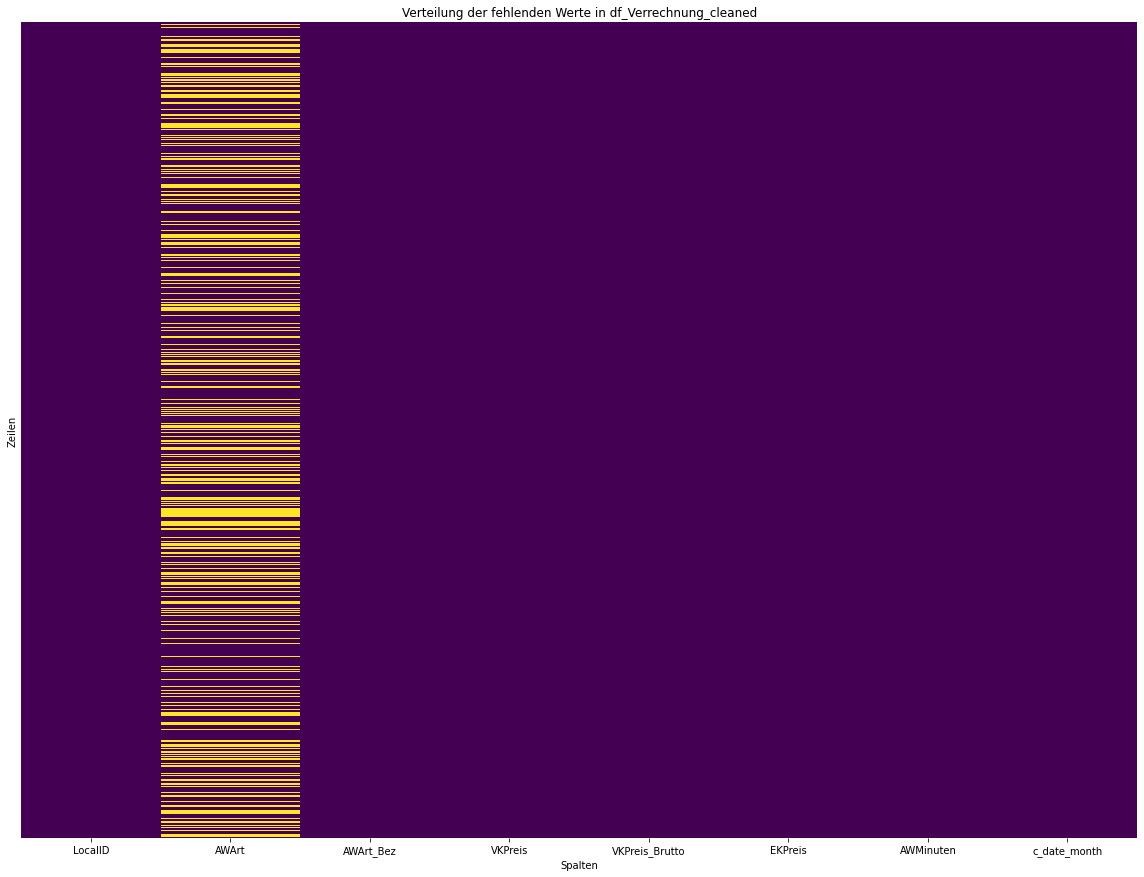

In [157]:
# Erstelle eine neue DataFrame, die True ist, wenn Werte fehlen, sonst False
missing_values = df_Verrechnung_cleaned.isnull()

# Erstelle eine Heatmap, um die fehlenden Daten zu visualisieren
plt.figure(figsize=(20, 15))
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')

# Titel und Labels hinzufügen
plt.title('Verteilung der fehlenden Werte in df_Verrechnung_cleaned')
plt.xlabel('Spalten')
plt.ylabel('Zeilen')

# Zeige das Diagramm
plt.show()

Auffäligkeiten:

1. Insgesamt scheint der Datensatz recht vollständig zu sein, mit Ausnahme der relativ hohen Anzahl an fehlenden Werten in der Spalte "AWArt"

2. AWArt (4079 fehlende Werte): Dies könnte darauf hindeuten, dass in vielen Fällen die spezifische Arbeitswert-Art (AWArt) nicht erfasst wurde. Dies könnte ein Indikator dafür sein, dass diese Information oft nicht verfügbar ist oder dass sie in der Erfassungsroutine häufig übergangen wird.

### Statistische Analysen

#### Deskriptive Statistik

count: Anzahl der nicht fehlenden (nicht-NA/null) Einträge.

mean: Der Durchschnittswert der Einträge.

std: Die Standardabweichung, die die Streuung der Daten um den Durchschnitt herum misst.

min: Der kleinste Wert.

25%: Das 25. Perzentil, d.h. 25% der Daten liegen unter diesem Wert.

50%: Das Median oder 50. Perzentil.

75%: Das 75. Perzentil, d.h. 75% der Daten liegen unter diesem Wert.

max: Der größte Wert.

In [150]:
print("Verrechnung")
print(df_Verrechnung_cleaned.describe())

Verrechnung
            VKPreis  VKPreis_Brutto       EKPreis     AWMinuten
count  12006.000000    12006.000000  12006.000000  12006.000000
mean      58.195280       68.703290      5.882892     41.260870
std       48.289531       57.467089     18.589075     25.923639
min        0.000000        0.000000      0.000000      1.000000
25%        9.800000       11.330000      0.000000      6.000000
50%       65.000000       77.350000      0.000000     60.000000
75%       89.030000      105.910000      0.000000     60.000000
max      999.990000     1189.990000    200.000000     60.000000


Auffäligkeiten:

1. VKPreis (Verkaufspreis für ein AW): Es gibt Verkaufspreise mit einem Wert von 0, was auf kostenlose Dienstleistungen oder Datenerfassungsfehler hinweisen könnte. Ein maximaler Verkaufspreis von 999,99 könnte ein Ausreißer sein.
   
2. VKPreis_Brutto (Verkaufspreis Brutto für ein AW): Die Statistiken für den Bruttoverkaufspreis ähneln denen des Nettoverkaufspreises, was darauf hinweist, dass beide eng miteinander verbunden sind (wie erwartet, da Brutto Netto plus Mehrwertsteuer ist).
   
3. EKPreis (Einkaufspreis für ein AW): Die Standardabweichung ist im Vergleich zum Durchschnittspreis hoch, was auf einige ungewöhnlich hohe Einkaufspreise hindeutet.
   
4. AWMinuten (Anzahl Minuten pro AW): Der Median von 60 Minuten und der 75%-Quartilwert von ebenfalls 60 Minuten deuten darauf hin, dass eine große Anzahl von Arbeitswerten genau eine Stunde beträgt, was auf einen Standardwert oder eine übliche Abrechnungseinheit hinweisen könnte. Der minimale Wert von 1 Minute erscheint ungewöhnlich niedrig und könnte einen Eingabefehler darstellen.

#### Verteilung den Daten (Histogramme, Balkendiagramme und Boxplots)

1. Balkendiagramm: Gut geeignet, um die Häufigkeit von Kategorien zu zeigen. 
2. Histogramm: Zeigt die Verteilung von numerischen Daten.
3. Boxplot: Kann verwendet werden, um Ausreißer und die Verteilung von Quartilen zu identifizieren.

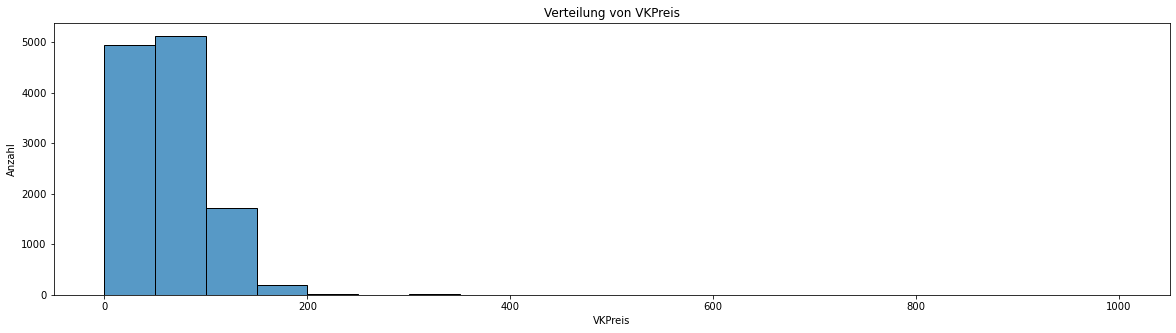

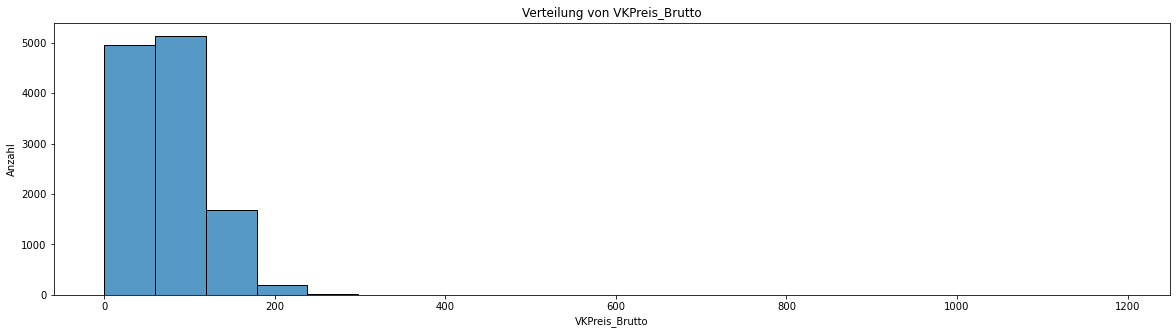

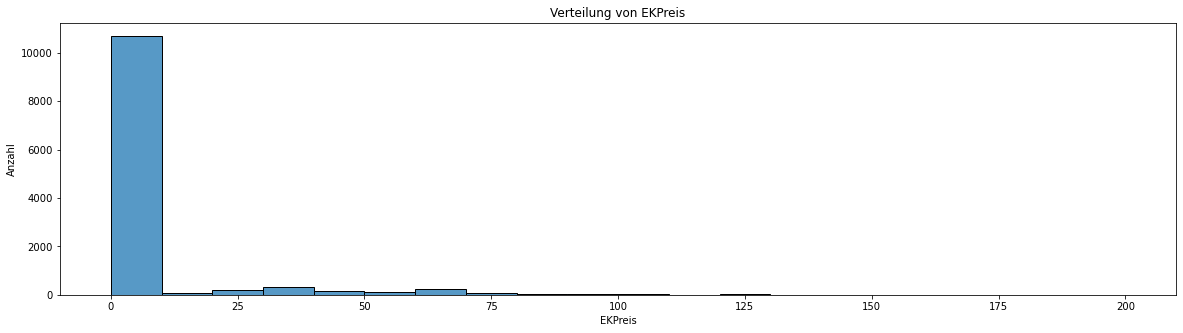

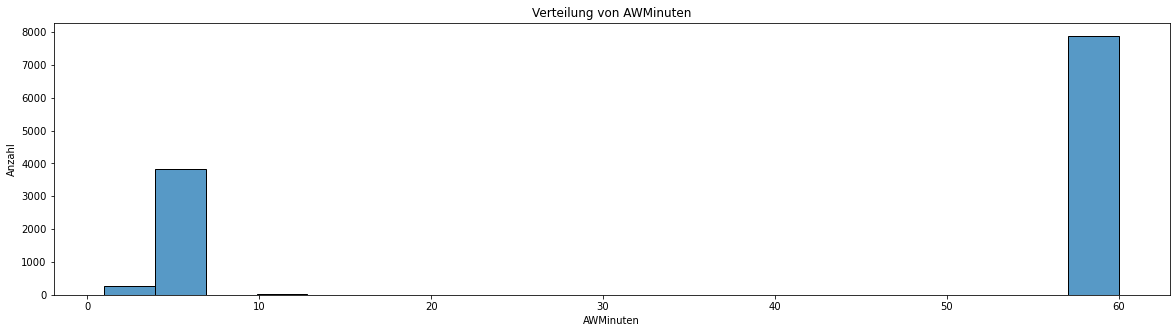

In [162]:
num_attributes = ['VKPreis', 'VKPreis_Brutto', 'EKPreis', 'AWMinuten']

for attribute in num_attributes:
    plt.figure(figsize=(20, 5))
    sns.histplot(df_Verrechnung_cleaned[attribute].dropna(), kde=False, bins=20)  # KDE auf False setzen, wenn man keine Dichteschätzung braucht
    plt.title(f'Verteilung von {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Anzahl')
    plt.show()

Auffäligkeiten:

1. Verteilung von VKPreis: Dieses Histogramm zeigt eine rechtschiefe Verteilung, was bedeutet, dass die meisten Datenpunkte auf der linken Seite des Diagramms liegen. Es gibt eine hohe Häufigkeit im niedrigsten Preissegment, was darauf hindeutet, dass die meisten Verkaufspreise relativ niedrig sind.

2. Verteilung von VKPreis, Brutto: Ähnlich wie das erste Diagramm zeigt auch dieses eine rechtschiefe Verteilung der Bruttoverkaufspreise.

3. Verteilung von EKPreis: Dieses Histogramm zeigt eine sehr spitze Verteilung mit einer extrem hohen Häufigkeit im niedrigsten Preissegment und fast keinen Datenpunkten in den höheren Preisbereichen. Dies deutet darauf hin, dass fast alle Einkaufspreise sehr niedrig sind.

4. Verteilung von AVMinuten: Das letzte Diagramm zeigt eine bimodale Verteilung mit zwei Spitzen: eine sehr hohe im niedrigsten Bereich und eine weitere, deutlich niedrigere Spitze im höchsten Bereich der Datenpunkte. Dies könnte darauf hindeuten, dass es zwei häufige Zeiten gibt, die für eine bestimmte Aktivität aufgewendet werden.

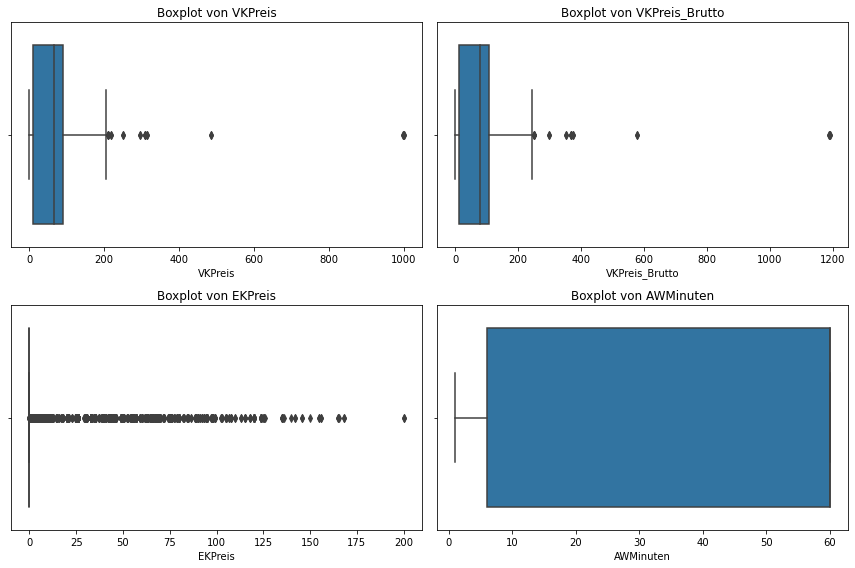

In [152]:
# Bestimme die Anzahl der numerischen Spalten und die Anzahl der gewünschten Spalten pro Reihe
num_columns = df_Verrechnung_cleaned.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)
num_columns_per_row = 2  # oder wie viele mam pro Reihe anzeigen möchte

# Berechne die Anzahl der benötigten Reihen, um alle Plots unterzubringen
num_rows = num_plots // num_columns_per_row + (num_plots % num_columns_per_row > 0)

# Definiere die Größe des gesamten Plots (Breite, Höhe)
plt.figure(figsize=(num_columns_per_row * 6, num_rows * 4))  # Die Größe kann angepasst werden

# Erstelle einen Boxplot für jede numerische Spalte
for index, column in enumerate(num_columns, 1):  # Beginne mit 1 für die subplot-Nummerierung
    plt.subplot(num_rows, num_columns_per_row, index)
    sns.boxplot(x=df_Verrechnung_cleaned[column])
    plt.title(f'Boxplot von {column}')

# Sorge für genügend Platz zwischen den Plots
plt.tight_layout()
plt.show()

Bei der Interpretation von Boxplots sind folgende Merkmale von besonderem Interesse:

1. Median (mittlere Linie des Boxplots): Zeigt den mittleren Wert der Daten.

2. Interquartilsabstand (IQR, die Box selbst): Stellt die mittleren 50% der Daten dar.

3. Whisker (die Linien, die aus der Box herausragen): Sie repräsentieren den Bereich der Daten, der typischerweise als nicht-ausreißerhaft betrachtet wird, oft 1,5-mal den IQR über und unter der Box.

4. Punkte außerhalb der Whisker: diese werden als potenzielle Ausreißer betrachtet.

Auffäligkeiten:

1. VKPreis (Verkaufspreis für ein AW): Es gibt einige Ausreißer, die deutlich über dem oberen Quartil liegen, was auf einzelne AWs mit besonders hohen Verkaufspreisen hinweist.
   
2. VKPreis_Brutto (Verkaufspreis Brutto für ein AW): Ähnlich wie bei VKPreis.
   
3. EKPreis (Einkaufspreis für ein AW): Es gibt auch hier einige Ausreißer mit höheren Einkaufspreisen, aber weniger extrem als bei den Verkaufspreisen.
   
4. AWMinuten (Anzahl Minuten pro AW): Der Boxplot für AWMinuten zeigt, dass fast alle Datenpunkte auf den Maximalwert von 60 Minuten konzentriert sind. Dies deutet darauf hin, dass in der Regel für jeden AW eine Stunde berechnet wird.

### Analyse der Zusammenhänge der Daten

#### Verlauf über die Zeit

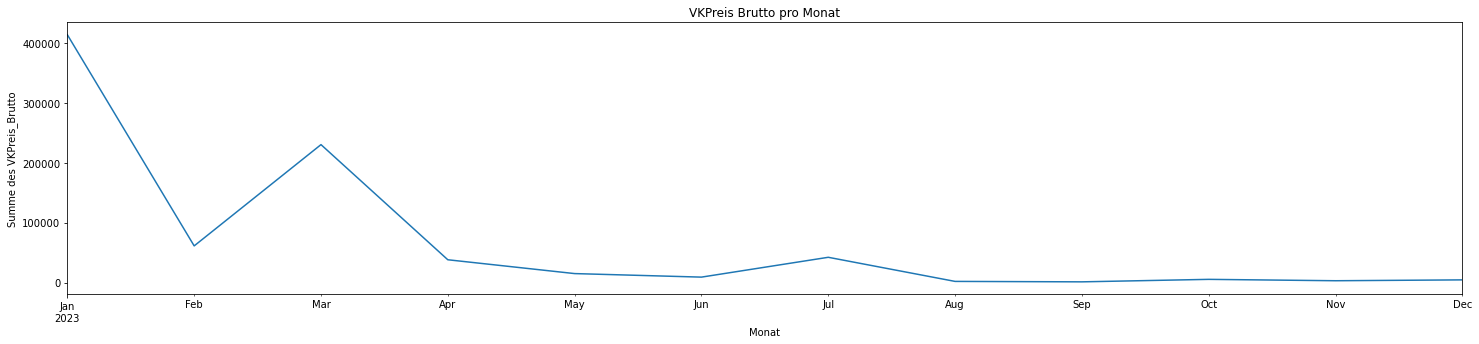

In [153]:
# Sicher stellen, dass die Datumsspalten im richtigen Format sind
df_Verrechnung_cleaned['c_date'] = pd.to_datetime(df_Verrechnung_cleaned['c_date'])

# Datum als Index setzen
df_Verrechnung_cleaned.set_index('c_date', inplace=True)

# Sortieren den DataFrame nach dem Index (Datum)
df_Verrechnung_cleaned.sort_index(inplace=True)

# Summe des VKPreis_Brutto pro Monat aus df_Verrechnung_cleaned analysieren
vkpreis_brutto_monatlich = df_Verrechnung_cleaned['VKPreis_Brutto'].resample('M').sum()

# Visualisieren den VKPreis_Brutto pro Monat
plt.figure(figsize=(25, 5))
vkpreis_brutto_monatlich.plot(title='VKPreis Brutto pro Monat')
plt.xlabel('Monat')
plt.ylabel('Summe des VKPreis_Brutto')
plt.show()

Auffäligkeiten:

1. Die meiste Verrechnungssätze werden in den ersten 3 Monaten des Jahres erstellt, gegen Ende des jahres nimmt die Erstellung des Verrechnungssätzen deutlich ab (die zur Verfügung gestellte Daten kommen aus 08.23, daher die Darstellung von Sep. Oct. Nov. und Dec. nicht relevant).

#### Korelationsmatrix

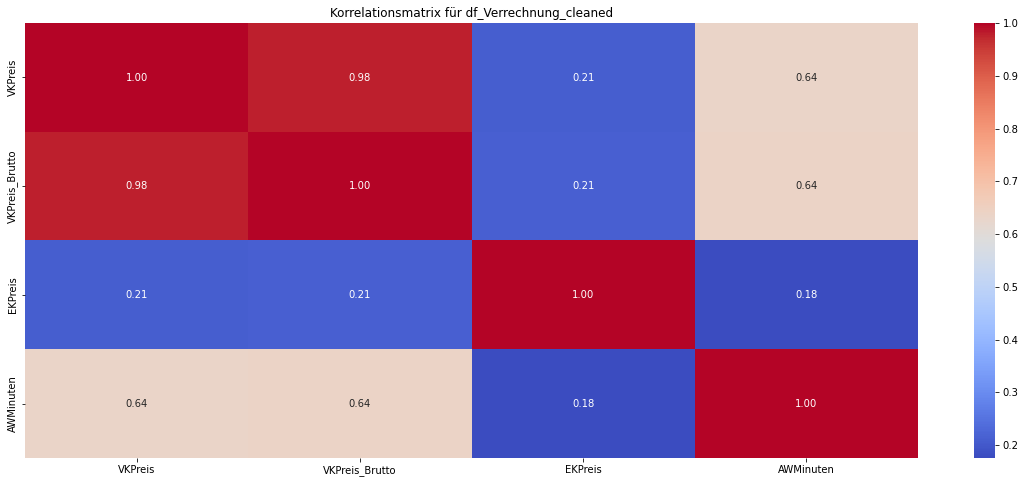

In [154]:
corr_matrix_verrechnung = df_Verrechnung_cleaned.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_verrechnung, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix für df_Verrechnung_cleaned")
plt.show()

Interpretation des Korrelationskoeffizients (r):

1. Nahe +1: Starke positive Korrelation; wenn Wert A steigt, steigt auch Wert B.
2. Nahe -1: Starke negative Korrelation; wenn Wert A steigt, fällt Wert B.
3. Nahe 0: Keine oder eine sehr schwache Korrelation; die Werte A und B scheinen unabhängig voneinander zu sein.

Korrelationsstärke:
1. 0,0 bis 0,2: Sehr schwache Korrelation
2. 0,2 bis 0,4: Schwache Korrelation
3. 0,4 bis 0,6: Moderate Korrelation
4. 0,6 bis 0,8: Starke Korrelation
5. 0,8 bis 1,0: Sehr starke Korrelation

Auffäligkeiten:

1. VKPreis / VKPreis_Brutto und AWMinuten (Anzahl Minuten pro AW): Es gibt eine moderate positive Korrelation von 0.64 zwischen den Verkaufspreisen und den Arbeitsminuten. Dies könnte bedeuten, dass Dienstleistungen, die mehr Zeit in Anspruch nehmen, tendenziell auch höher verrechnet werden.
   
2. VKPreis (Verkaufspreis für ein AW) und VKPreis_Brutto (Verkaufspreis Brutto für ein AW): Es gibt eine sehr hohe positive Korrelation von 0.98 zwischen diesen beiden Variablen, was zu erwarten ist, da der Bruttoverkaufspreis den Nettoverkaufspreis plus Mehrwertsteuer darstellt. Die Korrelation mit 0.98 sehr hoch, aber nicht exakt 1 ist, was eigentlich sein sollte bei der Betrachtung, dass die Nettoverkaufspreise (VKPreis) und die Bruttoverkaufspreise (VKPreis_Brutto), wenn sie ausschließlich durch die Hinzufügung eines konstanten Mehrwertsteuersatzes verbunden sind, eine perfekte Korrelation aufweisen sollen.

# Maßnahmen für die folgende Phase

Die Maßnahmen ergeben sich aus:
1. Ausgeführten Analysen (auf Basis von volständige PosArt und Verrechnung Tabellen und dem Sampel (1/10) den Rohdaten für die Tabelle Belege)
2. Sicht Prüfung den Tabellen
3. Analyse des Task2b

## Grundsetzliches

1. Anpassung der Datentypen (zB. Verrechnung: in der Tabelle alle Rohdaten sind als Objekte typisiert)
2. Entfernen der Duplikate (zB. Verrechnung: beinhaltet insgesamt 94 Duplikate)
3. Umlaute ersetzen (zB. Belge: GENART_BEZ beinhaltet Umlaute)
4. Fehlende Werte ersetzen oder entfernen (zB. Verrechnung: AWArt beinhaltet 4052 Fehlende Werte)
5. Fehlerhafte Angaben korrigieren (zB. Belege: RechEmpfhatMobile soll nur Ja oder Nein Werte beinhalten)

## Tabelle Belege

1. Normalisierung der Tabelle
2. AWArt rekonstruiren aus LocalID, VKPreis, Minuten_pro_AW, c_date (?) und TEXT1

## Tabelle Verrechnung

1. Eliminieren der Uneindeutigkeit bei Größe AWArt, sodass zB. der VKPreis mittels Primärschlüssel LocalID und Sekundärschlüssel AWArt ermittelt werden kann
2. c_date anpassen, sodass Datum und Zeit in getrennten Spalten angezeigt werden

## Benötigte Größen für Task2b

Um folgende Punkte in Task2b zu analysieren und  visualisieren:

1. Preis-Vergleiche auf PLZ-Ebene: Wie ordnet sich eine ausgewählte Werkstatt im Vergleich zur 
(aggregierten) Konkurrenz ein?
2. Mengen-Vergleiche auf PLZ-Ebene: Wie ordnet sich eine ausgewählte Werkstatt im Vergleich zur (aggregierten) Konkurrenz ein? 
3. Vergleich der CRM-/Kundenbindungsmaßnahmen: Was lässt sich hier aus den Daten ableiten? 
4. Vergleich unter Einbezug der Herstellerinformationen: Häufigkeit eines Fahrzeugherstellers je Region. Gibt es einen Zusammenhang zwischen Arbeitswerten und häufigen Herstellern? 

Werden folgende Größen benötigt:

Tabelle Belege:

1. LocalID: GUID einer einzelnen Werkstatt
2. BelegID: ID, welche innerhalb einer Werkstatt die Positionen zu einem Vorgang zusammenfast
3. Fzg_Hersteller: Fahrzeug Hersteller des Fahrzeuges
4. POS_ART: Typ/Art der einzelnen Position ->key_PosArt.csv
5. GENARTNR: ID der Produktgruppe für ET. Nicht immer vorhanden
6. GENART_BEZ: Bezeichnung der Produktgruppe
7. Menge: Menge
8. VK_Preis: Verkaufspreis
9. Minuten_pro_AW: Anzahl Minuten pro AW (Arbeitswert)
10. PLZ: PLZ der Werkstatt
11. RechEmpfhatEMail: EMail Adresse vorhanden vom Rechnungsempfänger JA/NEIN
12. RechEmpfhatMobil: Mobil-Nummer vorhanden vom Rechnungsempfänger JA/NEIN
13. RechEmpfmitGeburtstag: Geburtstag vorhanden vom Rechnungsempfänger JA/NEIN

Tabelle Verrechnung:

1. LocalID: GUID einer einzelnen Werkstatt
2. AWArt: Arbeitswerte Art Kürzel
3. AWArt_Bez: Bezeichnung der Arbeitswerte Art

Tabelle PosArt:

1. PosArt: Typ/Art der einzelnen Position
2. Bezeichnung: Bezeichnung der PosArt